### Importing the required Packages

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import scipy.stats as stats

### Loading the required files

In [2]:
df = pd.read_csv('D:/Full_SatckDataAnalytics_Notes/FSDA_Internship_Project/FDI.csv', header = 0, index_col = 0)

In [3]:
df.head()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [4]:
df.shape

(63, 17)

### Initial EDA

Transforming the Dataset

#### Repalcing some Long names of Sectors  to Short names

In [5]:
df_copy = df.copy(deep = True)

In [6]:
df_copy.rename(index = {"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)":
                             "SERVICES SECTOR", "CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects":
                              "CONSTRUCTION DEVELOPMENT","TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)":"TEA & COFFEE",
                              "PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)":"PRINTING OF BOOK",
                              "LEATHER,LEATHER GOODS AND PICKERS":"LEATHER,LEATHER GOODS & PICKERS",
                              "PAPER AND PULP(INCLUDING PAPER PRODUCTS)":"PAPER & PULP",
                              "MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS":"MATHEMATICAL,SURVEYING & DRAWING INSTRUMENTS",
                              "INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)":"INFORMATION & BROADCASTING",
                              "PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)":"PRIME MOVER"}, inplace = True) 

#### Transpose the dataframe

In [7]:
dfp = df_copy.transpose()
dfp.index = [x[1] for x in dfp.index.str.split('-')]
dfp.index = str('20') + dfp.index
print(type(dfp.index))


<class 'pandas.core.indexes.base.Index'>


In [8]:
dfp.head()

Sector,METALLURGICAL INDUSTRIES,MINING,POWER,NON-CONVENTIONAL ENERGY,COAL PRODUCTION,PETROLEUM & NATURAL GAS,BOILERS AND STEAM GENERATING PLANTS,PRIME MOVER,ELECTRICAL EQUIPMENTS,COMPUTER SOFTWARE & HARDWARE,...,TRADING,RETAIL TRADING,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA & COFFEE,PRINTING OF BOOK,COIR,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,CONSTRUCTION DEVELOPMENT,MISCELLANEOUS INDUSTRIES
2001,22.69,1.32,89.42,0.00,0.00,9.35,0.00,0.00,79.76,228.39,...,11.49,0.0,17.52,18.83,20.23,0.00,0.00,0.0,24.33,832.07
2002,14.14,6.52,757.44,0.00,0.00,211.07,0.00,0.00,65.76,419.39,...,43.27,0.0,14.06,0.36,0.14,0.00,0.00,0.0,51.75,221.37
2003,36.61,10.06,59.11,1.70,0.00,56.78,0.00,0.00,34.71,314.24,...,38.13,0.0,11.01,1.30,0.00,6.30,0.00,0.0,36.10,218.76
2004,8.11,23.48,27.09,4.14,0.04,80.64,0.04,0.00,73.20,368.32,...,31.12,0.0,0.59,1.96,0.32,0.00,0.00,0.0,47.04,235.48
2005,200.38,9.92,43.37,1.27,0.00,102.78,0.54,2.66,97.40,527.90,...,14.22,0.0,3.83,8.58,0.01,0.06,0.47,0.0,152.06,121.83


In [9]:
dfp.shape

(17, 63)

In [10]:
data = dfp.copy(deep=True)

In [11]:
dfp_copy1 = dfp.copy(deep=True) # Created the copy of original dataset

#### Writing the functions that we will be using for further calculations of FDI

In [12]:
 # Function for Total FDI calculation 
    
def TotalFDI_calculation(df_name, axis_var):
    TotalFDI= df_name.sum(axis=axis_var)
    
    if axis_var == 1:
        Percentage = round(TotalFDI.pct_change()*100,2)
        col1 = 'Year'
        col3 = 'Percentage Change'
    else:
        Percentage = round((df_name.sum()/TotalFDI.sum())*100,2)
        col1 = 'Sector'
        col3 = '%of Total FDI'   
    dict_FDI = {col1 : TotalFDI.index,
             'Total FDI' : TotalFDI.values,
              col3 :Percentage.values}
    df_dictFDI = pd.DataFrame(dict_FDI)
        
    return df_dictFDI
    

In [13]:
# Function to add the data lables

def addlabels(sectors,amount):
    for i in range(len(sectors)):
        plt.text(i, round(amount[i],2), round(amount[i],2), ha = 'center')

### FDI in various sectors of Indian Economy from 2000 to 2017

Text(0, 0.5, 'Amount is million USD')

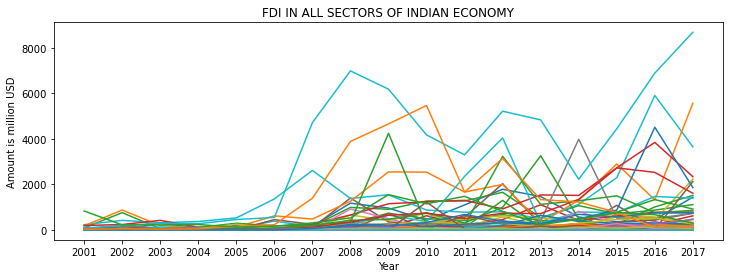

In [14]:
plt.figure(figsize=(12,4))
plt.plot(dfp_copy1)
plt.title('FDI IN ALL SECTORS OF INDIAN ECONOMY')
plt.xlabel('Year')
plt.ylabel('Amount is million USD')

This is very untidy interpretation of data. So let's see the trend of total FDI inflow index. 

#### Calculated the total FDI inflows and Percentage change Yearwise  

In [15]:
# Total FDI Yearwise with Percentage change

TotalFDIYearwise = TotalFDI_calculation(dfp_copy1, 1) # For yearwise um of FDI we pass axis variable = 1
TotalFDIYearwise =  TotalFDIYearwise.style.hide_index()
TotalFDIYearwise.set_precision(2)


C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\3831247937.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  TotalFDIYearwise =  TotalFDIYearwise.style.hide_index()
C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\3831247937.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  TotalFDIYearwise.set_precision(2)


Year,Total FDI,Percentage Change
2001,2378.71,nan
2002,4027.69,69.32
2003,2704.32,-32.86
2004,2187.85,-19.10
2005,3218.69,47.12
2006,5539.75,72.11
2007,12491.76,125.49
2008,24575.40,96.73
2009,31395.96,27.75
2010,25834.38,-17.71



###  Graphical representation of FDI index by the year

Text(0, 0.5, 'Amount in USD')

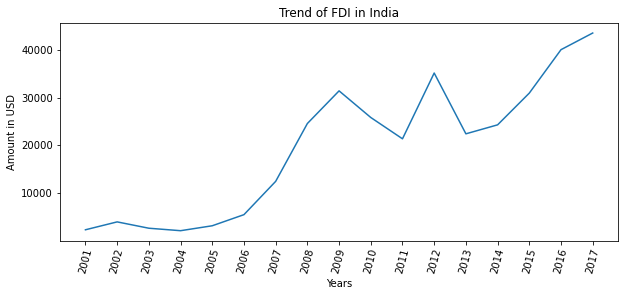

In [16]:
TotalFDI_Yearwise = dfp_copy1.sum(axis=1)
plt.figure(figsize=(10,4))
plt.plot(TotalFDI_Yearwise)
plt.title("Trend of FDI in India")
plt.xlabel("Years")
plt.xticks(rotation=75)
plt.ylabel("Amount in USD")

* The above graph shows the total Foreign Direct Investment inflows of India from 2000 to 2017.
* From 2006 it started going up with a great hike but then there was a little downfall from 2009 to 2011 and from 2012 to 2013
* After the downfall, again in 2014 it started going in an upward direction and reached its highest level 
  in the last 17 years( from 2000 to 2017).


#### Calculated the Total FDI inflows and Percentage Sectorwise

In [17]:
# Total FDI ectorwise with Percentage their percentage of Total FDI

TotalFDI_Sectorwise= TotalFDI_calculation(dfp_copy1, 0) # For sectorwise sum of FDI we pass axis variable = 0
TotalFDI_Sectorwise = TotalFDI_Sectorwise.sort_values(by='Total FDI', ascending = False) 
TotalFDI_Sectorwise =  TotalFDI_Sectorwise.style.hide_index() # used styler to hide the index
TotalFDI_Sectorwise.set_precision(2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\1966061352.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  TotalFDI_Sectorwise =  TotalFDI_Sectorwise.style.hide_index() # used styler to hide the index
C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\1966061352.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  TotalFDI_Sectorwise.set_precision(2)


Sector,Total FDI,%of Total FDI
SERVICES SECTOR,59476.49,17.92
COMPUTER SOFTWARE & HARDWARE,24669.49,7.43
CONSTRUCTION DEVELOPMENT,24293.09,7.32
TELECOMMUNICATIONS,23946.01,7.21
AUTOMOBILE INDUSTRY,16673.92,5.02
DRUGS & PHARMACEUTICALS,14706.90,4.43
TRADING,14210.88,4.28
CHEMICALS (OTHER THAN FERTILIZERS),13293.09,4.00
POWER,11589.13,3.49
METALLURGICAL INDUSTRIES,10330.54,3.11


 Total FDI Sectorwise and their percentage to overall FDI inflow

# Analyzing the Best and Worst Performing Sectors

   #### Top 5 sectors which are the most invested in

In [18]:
# Top 5 Sectors

top_sectors = TotalFDI_calculation(dfp_copy1, 0) # called the UDF TotalFDI_calculation
top_sectors = top_sectors.nlargest(5,'Total FDI') # used the predefined nlargest() function for top n values
top_sectors =top_sectors.style.hide_index()
top_sectors.set_precision(2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\102557517.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  top_sectors =top_sectors.style.hide_index()
C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\102557517.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  top_sectors.set_precision(2)


Sector,Total FDI,%of Total FDI
SERVICES SECTOR,59476.49,17.92
COMPUTER SOFTWARE & HARDWARE,24669.49,7.43
CONSTRUCTION DEVELOPMENT,24293.09,7.32
TELECOMMUNICATIONS,23946.01,7.21
AUTOMOBILE INDUSTRY,16673.92,5.02


#### Bar chart of Top 5 sectors of FDI in India

In [19]:
top = dfp_copy1.sum().sort_values(ascending = False)
top5 = top.head(5)

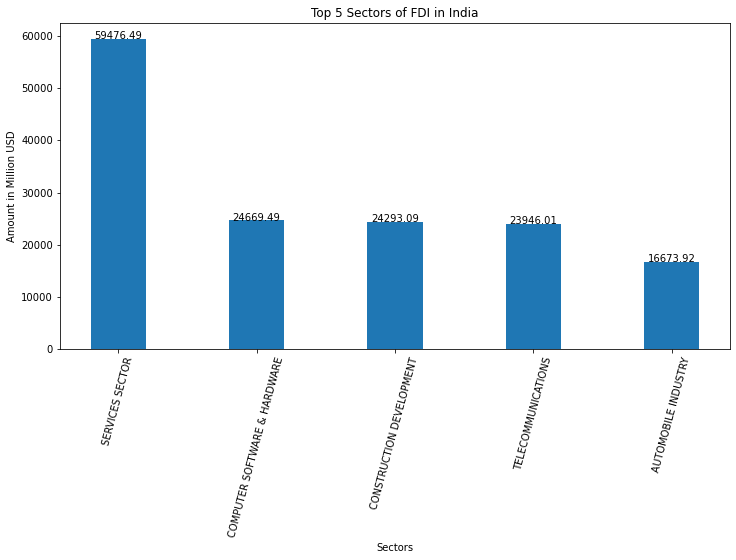

In [20]:
plt.figure(figsize=(12,6))
plt.bar(top5.index,top5.values,width = 0.4)
addlabels(top5.index, top5.values) 
plt.xlabel("Sectors")
plt.ylabel("Amount in Million USD")
plt.title("Top 5 Sectors of FDI in India")
plt.xticks(rotation=75)
plt.show()

* From the above Chart, we can understand that Service Sector Managed to Attract the highest FDI of  
  $59476.49 Million which was greater than any other Sector with a share of 17.65% of total FDI inflows.
* We can say that these top 5 sectors collectively contributed to attracting 44.9 % of total FDI 
  among all other sectors.

#### Bottom 5 Sectors of FDI

In [21]:
# Bottom 5 Sectors

bottom_sectors = TotalFDI_calculation(dfp_copy1, 0) # called the UDF TotalFDI_calculation
bottom_sectors = bottom_sectors.nsmallest(5,'Total FDI') # used the predefined nsmallest() function for top n values
bottom_sectors = bottom_sectors.style.hide_index()
bottom_sectors.set_precision(2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\2550620129.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  bottom_sectors = bottom_sectors.style.hide_index()
C:\Users\ACER\AppData\Local\Temp\ipykernel_5220\2550620129.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  bottom_sectors.set_precision(2)


Sector,Total FDI,%of Total FDI
COIR,4.06,0.00
DEFENCE INDUSTRIES,5.12,0.00
"MATHEMATICAL,SURVEYING & DRAWING INSTRUMENTS",7.98,0.00
COAL PRODUCTION,27.74,0.01
PHOTOGRAPHIC RAW FILM AND PAPER,67.28,0.02


#### Bar chart for bottom 5 sectors

In [22]:
bottom = dfp_copy1.sum().sort_values(ascending = True)
bottom5 = bottom.head(5)

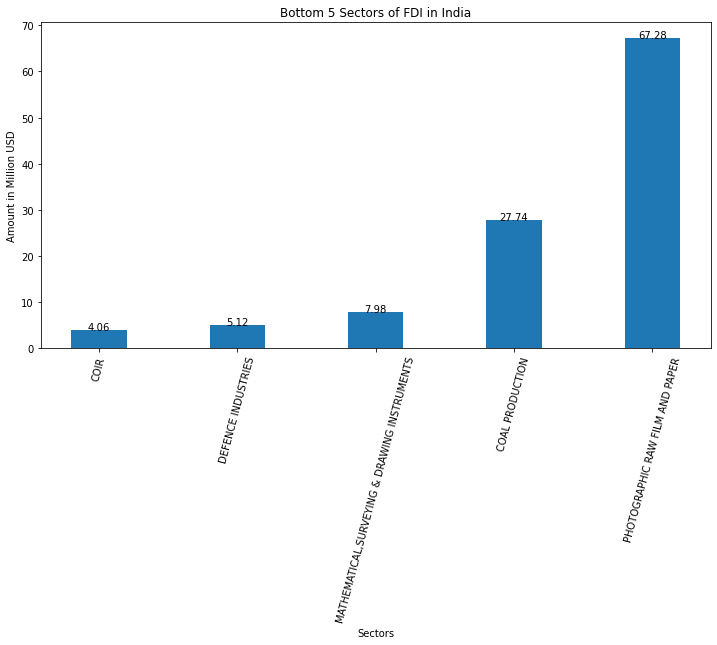

In [23]:
plt.figure(figsize=(12,6))
plt.bar(bottom5.index,bottom5.values,width = 0.4)

addlabels(bottom5.index,bottom5.values) 
plt.xlabel("Sectors")
plt.ylabel("Amount in Million USD")
plt.title("Bottom 5 Sectors of FDI in India")
plt.xticks(rotation=75)
plt.show()


#### Top 5 Sectors in FDI India over the years (from 2000-2017)

In [24]:
df_filter=data.filter(items=['SERVICES SECTOR', 'COMPUTER SOFTWARE & HARDWARE',
       'CONSTRUCTION DEVELOPMENT', 'TELECOMMUNICATIONS',
       'AUTOMOBILE INDUSTRY'])

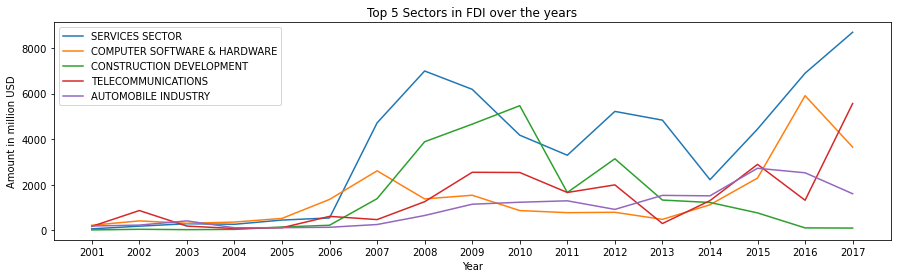

In [25]:
plt.figure(figsize=(15,4))
plt.plot(df_filter)
plt.title('Top 5 Sectors in FDI over the years')
plt.xlabel('Year')
plt.ylabel('Amount in million USD')
plt.legend(['SERVICES SECTOR ', 'COMPUTER SOFTWARE & HARDWARE',
            'CONSTRUCTION DEVELOPMENT', 'TELECOMMUNICATIONS',
            'AUTOMOBILE INDUSTRY'])
  

<Figure size 1080x648 with 0 Axes>

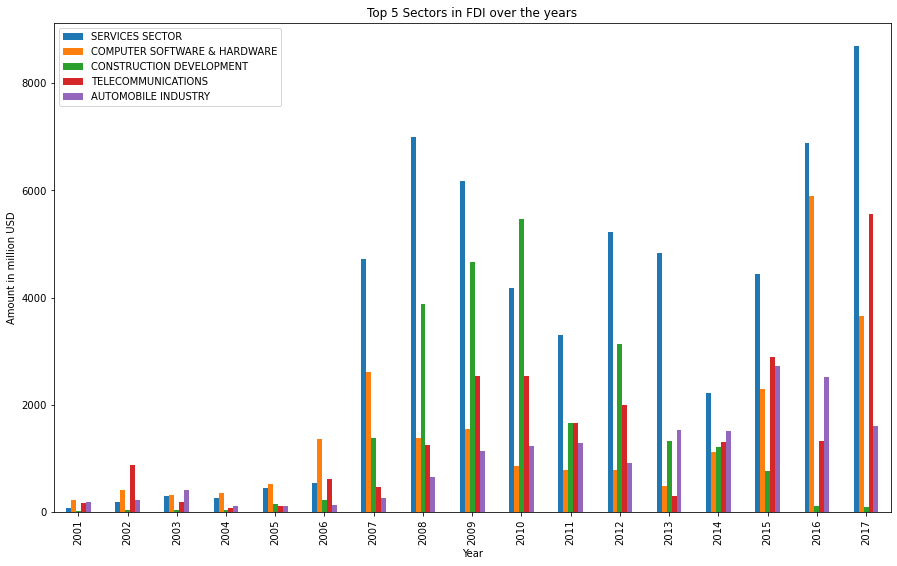

In [26]:
plt.figure(figsize=(15,9))
df_filter.plot(kind="bar",figsize=(15,9))
plt.title('Top 5 Sectors in FDI over the years')
plt.xlabel('Year')
plt.ylabel('Amount in million USD')
plt.legend(['SERVICES SECTOR ', 'COMPUTER SOFTWARE & HARDWARE',
            'CONSTRUCTION DEVELOPMENT', 'TELECOMMUNICATIONS',
            'AUTOMOBILE INDUSTRY'])

  

 * These are the top 5 sectors which have received the most foreign investments in 2000-2017 years. 
 * It can be seen that most of these sectors have an 100%+ increment in investments. 
 * Few have remained stagnant while some industries like Construction Development has gone down.

# Analyzing the trend of FDI and its impact on Indian GDP

Load the file containing the GDP information from 2001 to 2017

In [27]:
dfGDP = pd.read_csv('D:/Full_SatckDataAnalytics_Notes/FSDA_Internship_Project/GDP_CSV.csv', header = 0, index_col = 0)

In [28]:
dfGDP.head()

,GDP
date,
12/31/2001,485441.01
12/31/2002,514937.95
12/31/2003,607699.29
12/31/2004,709148.51
12/31/2005,820381.60


In [29]:
dfGDP.describe()

,GDP
count,1.700000e+01
mean,1.418082e+06
std,6.736425e+05
min,4.854410e+05
25%,8.203816e+05
50%,1.341887e+06
75%,1.856722e+06
max,2.651473e+06


#### Transforming the GDP dataset

In [30]:
dfGDP.index

Index(['12/31/2001', '12/31/2002', '12/31/2003', '12/31/2004', '12/31/2005',
       '12/31/2006', '12/31/2007', '12/31/2008', '12/31/2009', '12/31/2010',
       '12/31/2011', '12/31/2012', '12/31/2013', '12/31/2014', '12/31/2015',
       '12/31/2016', '12/31/2017'],
      dtype='object', name='date')

In [31]:
dfGDP.index= [x[0] for x in dfp.index.str.split('/')]

In [32]:
dfGDP.index

Index(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [33]:
dfGDP.head()

,GDP
2001,485441.01
2002,514937.95
2003,607699.29
2004,709148.51
2005,820381.60


In [34]:
dfp_Total = TotalFDI_Yearwise

In [35]:
dfp_Total.values # Total FDI values yearwise

array([ 2378.71,  4027.69,  2704.32,  2187.85,  3218.69,  5539.75,
       12491.76, 24575.4 , 31395.96, 25834.38, 21383.07, 35120.78,
       22423.59, 24299.32, 30930.47, 40000.99, 43478.26])

In [36]:
dfGDP.values # GDP yearwise

array([[ 485441.01],
       [ 514937.95],
       [ 607699.29],
       [ 709148.51],
       [ 820381.6 ],
       [ 940259.89],
       [1216735.44],
       [1198895.58],
       [1341886.6 ],
       [1675615.34],
       [1823049.93],
       [1827637.86],
       [1856722.12],
       [2039127.45],
       [2103587.81],
       [2294797.98],
       [2651472.95]])

We converted the FDI Total inflows(For all the sectors) and GDP values into numpy array
And reshape the GDP array to match the dimensions of the both.

In [37]:
GDP = np.array(dfGDP.values)
FDI = np.array(dfp_Total.values)
GDP = GDP.reshape(17)

In [38]:
GDP

array([ 485441.01,  514937.95,  607699.29,  709148.51,  820381.6 ,
        940259.89, 1216735.44, 1198895.58, 1341886.6 , 1675615.34,
       1823049.93, 1827637.86, 1856722.12, 2039127.45, 2103587.81,
       2294797.98, 2651472.95])

In [39]:
FDI

array([ 2378.71,  4027.69,  2704.32,  2187.85,  3218.69,  5539.75,
       12491.76, 24575.4 , 31395.96, 25834.38, 21383.07, 35120.78,
       22423.59, 24299.32, 30930.47, 40000.99, 43478.26])

### Checking the correlation between FDI and GDP

* Foreign Direct Investments help in boosting the growth of Indian economy. India has witnessed a growth in 
  the flow of Foreign Direct investment.
* The objective of this study is to analyse the trend of FDI in India and to analyse the impact of FDI on 
  Indian GDP during 2000 to 2017.

In [40]:
corr = np.corrcoef(FDI,GDP)

In [41]:
corr

array([[1.        , 0.91374527],
       [0.91374527, 1.        ]])

#### FDI and GDP Scatterplot

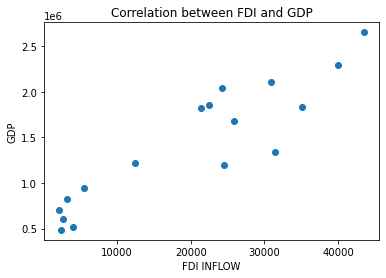

In [42]:
plt.scatter(x=FDI, y=GDP)
plt.ylabel('GDP')
plt.xlabel('FDI INFLOW')
plt.title('Correlation between FDI and GDP')
plt.show()

#### Correlation Heatmap between FDI and GDP

[Text(0.5, 15.0, 'FDI INFLOW'), Text(15.0, 0.5, 'GDP')]

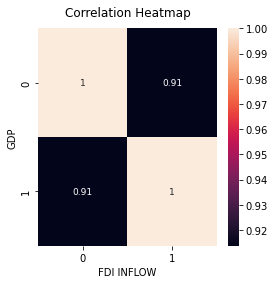

In [43]:
plt.figure(figsize= (4,4))
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
s = sns.heatmap(corr, annot= True, annot_kws= {'size' :9 } )
s.set(xlabel='FDI INFLOW', ylabel='GDP')

* The above heat map shows that FDI and GDP has strong relationship. 
* From this we can say that there is a very high correlation between the FDI inflows and GDP of India.

# Conclusion

* It is found that FDI Inflows in India show a positive trend over the period ( 2000 to 2017 ) under study.


* While studying the sectorial perspective, it is found that the Service sector tops in attracting the highest FDI inflows, 
  followed by the Computer Software & Hardware, and Construction Development sector.


* Coir, Defence Industries, Mathematical, Surveying & Drawing Instruments, Coal Production, and Photographic Raw Film & 
  Paper are the worst-performing sectors that failed to attract considerable foreign inflows in the last 17 
  years(2000 to 2017).


* The global financial crisis (2008) impacted GDP growth and FDI flows worldwide and India was not an exception. 


* Because of the high inflation and other macroeconomic issues, India witnessed a drop in FDI flows from 2012-13. 


* In 2014, the Government of India launched the ‘Make in India’ initiative to facilitate investment, foster innovation, 
  and build best-in-class manufacturing infrastructure. The reform made a positive foreign investment climate in India 
  and helped in increasing growth in FDI inflows.


* Correlation Analysis result indicates that the FDI inflow generally has a positive impact on the Economic Growth/ GDP 
  of India.